# **Tugas 4 | Pipelines**

## Web Orches [Orches](https://www.orchest.io/)

## DBMS ke Power BI

Berikut Deskripsi Atau Langkah langkah untuk menggabungkan data dari berbagai sumber seperti : **Mysql**, **SQL** **Server**, **PostgresSql**, dan ***elephantsql***

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pada tahap ini, mengumpulkan data dari berbagai `dbms` ke `power bi` untuk dijadikan file `CSV`. Pada Power Bi, select `Get Data` dan pilih connector seperti dibawah ini. Lalu masukkan server,hostname dan nama databasenya.

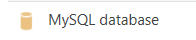
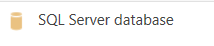
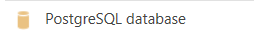

### Hasil dari **`PostgreSQL Local`** ke Power Bi

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('/content/drive/MyDrive/prosaindata/tugas/Data/data_postgresSql.csv')

In [55]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Mengambil data `Sepal Length`

In [56]:
data_postgreSQL= df.drop(['sepalwidth','petallength','petalwidth','class'],axis=1)

### Hasil dari **`SQL SERVER Local`** ke Power Bi

In [57]:
df = pd.read_csv('/content/drive/MyDrive/prosaindata/tugas/Data/data_sqlServer.csv')

In [58]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,6,4.0,1.2,0.2,Iris-setosa
1,6,4.4,1.5,0.4,Iris-setosa
2,6,3.8,1.7,0.3,Iris-setosa
3,6,4.2,1.4,0.2,Iris-setosa
4,6,3.5,1.3,0.2,Iris-setosa


Mengambil data `petal width` dan `class`

In [59]:
data_SqlServer= df.drop(['sepallength','sepalwidth','petallength'],axis=1)

### Hasil dari **`MySQL Local`** ke Power Bi

In [60]:
df = pd.read_csv('/content/drive/MyDrive/prosaindata/tugas/Data/data_mysql.csv')

In [61]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Mengambil data `petal length`

In [62]:
data_Mysql= df.drop(['sepallength','sepalwidth','petalwidth','class'],axis=1)

## Elephantsql ke Python


Install Libary yang dibutuhkan


In [63]:
!pip install psycopg2-binary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


lalu import

In [64]:
import psycopg2


setelah itu lakukan connection ke Elephantsql Menggunakan libary tersebut

In [65]:
conn = psycopg2.connect(user="jokdogzx",
                        password="6cn9QAJuHJiRGzFFpTPwH0ECv0JIelE_",
                        host="floppy.db.elephantsql.com",database="jokdogzx")
cursor = conn.cursor()


In [66]:
cursor.execute("SELECT * FROM iris")
data = cursor.fetchall()

In [67]:
column = data.pop(0)
column

('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class')

In [68]:
column = list(column)
df = pd.DataFrame(data,columns=column)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa


In [69]:
data_postgreSQLCloud= df.drop(['sepallength','petallength','petalwidth','class'],axis=1)
data_postgreSQLCloud['sepalwidth'] = pd.to_numeric(data_postgreSQLCloud['sepalwidth'])


## Get Data (*collecting data*)

Pada Pemrosesan Get data ini, menggunakan libary dari orchest sendiri. sehingga harus menginstall tersebih dahulu

Jika pada web orchest, sebelumnya kita import file agar data yang terpisah diatas dapat disatukan menggunakan libary ipynb `pip install ipynb`

Lalu import File yang bersangkutan seperti dibawah ini:
```
from ipynb.fs.full.PostgresSQLlocal import *
from ipynb.fs.full.PostgresSQLcloud import *
from ipynb.fs.full.MySQLlocal import *
from ipynb.fs.full.SQLServer import *
```

In [70]:
!pip install orchest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


selanjutnya import libary orchest

In [71]:
import orchest

### Mengumpulkan data menjadi satu dari data yang terpisah diatas

In [72]:
new_data_iris = pd.concat([data_postgreSQL,data_postgreSQLCloud,data_Mysql,data_SqlServer],axis=1)


### Label Encoding

In [73]:
new_data_iris['class'] = pd.Categorical(new_data_iris['class'])
new_data_iris["class"] = new_data_iris["class"].cat.codes
df_data = new_data_iris.values[:, 0:4]
df_target = new_data_iris.values[:, 4]
new_data_iris = new_data_iris.drop(columns=["class"])

### Inisialisasi Data ke Orchest

Inisialisasi Data ke Orchest agar dapat digunakan pada file lain

In [74]:
# orchest.output((df_data, df_target), name="data")

## Preprocessing MinMaxScaler

Pada Orchest / Pipeline terdapat proses `Preporcessing` karena menggunakan libary skalearn maka sebelumnya install libary tersebut.

In [75]:
!pip install scikit-learn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import libary yang sudah di install

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### Get data dari Orchest Proses Sebelumnya

In [77]:
# # Retrieve the data from the previous step.
# data = orchest.get_inputs()  # data = [(df_data, df_target)]
# X, y = data["data"]

### Scaling Data

In [78]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.20)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Split Data

In [79]:
# orchest.output((X_train, y_train, X_test, y_test), name="training_data")

## Perhitungan Menggunakan Berbagai Model 

Model Yang digunakan` Linear regression`,` Decision Tree`, `SVM`

### Model Linear Reqression

Inisialisasi Libary Yang dibutuhkan

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

mengambil data dari proses sebelumnya

In [81]:
# Retrieve the data from the previous step.
# data = orchest.get_inputs()
# X_train, y_train, X_test, y_test = data["training_data"]

Test Pada Model

In [82]:
# Fit model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Hitung Prediksi

In [83]:
# Make a prediction and determine the error.
y_test_prediction = np.round(model.predict(X_test))
print(y_test_prediction)
# test_rmse_lr =model.score(X_test,y_test)
test_rmse_lr = np.sqrt(accuracy_score(y_test, y_test_prediction))

[ 2.  2.  2. -0.  2.  0.  1.  0.  0. -0. -0.  1.  1.  2.  0.  1.  0.  1.
  1.  0.  1.  2.  0.  1.  0.  1.  0.  1.  1.  2.]


Kirim Hasil Prediksi

In [84]:
# orchest.output(test_rmse, name="linear-regression-rmse")

### Model Decision Tree

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [86]:
# # Retrieve the data from the previous step.
# data = orchest.get_inputs()
# X_train, y_train, X_test, y_test = data["training_data"]

In [87]:
# Fit model.
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [88]:
# Make a prediction and determine the error.
y_test_prediction = model.predict(X_test)
test_rmse_dt = np.sqrt(accuracy_score(y_test, y_test_prediction))

In [89]:
# orchest.output(test_rmse, name="decision-tree-regressor-rmse")

### Model SVM

In [90]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.svm import SVR

In [91]:
# # Retrieve the data from the previous step.
# data = orchest.get_inputs()
# X_train, y_train, X_test, y_test = data["training_data"]

In [92]:
# Fit model.
model = SVR()
model.fit(X_train, y_train.ravel())

SVR()

In [93]:
# Make a prediction and determine the error.
y_test_prediction = model.predict(X_test)
y_test_prediction = (np.round(y_test_prediction))
print(y_test_prediction)
test_rmse_svm = np.sqrt(accuracy_score(y_test, y_test_prediction))

[ 2.  2.  2. -0.  2. -0.  1.  0.  0.  0. -0.  1.  1.  2.  0.  1.  0.  1.
  1.  0.  1.  2.  0.  1.  0.  1.  0.  1.  1.  2.]


In [94]:
# orchest.output(test_rmse, name="svm-regressor-rmse")

## Collect Result

In [95]:
# data = orchest.get_inputs()
# print(data)

In [96]:
# for name, value in data.items():
#     if name != "unnamed":
#         print(f"\n{name:30} {value}")

In [97]:
print(f'linear-regression-rmse : {test_rmse_lr}')
print(f'decision-tree-regressor-rmse : {test_rmse_dt}')
print(f'svm-regressor-rmse  : {test_rmse_svm}')

linear-regression-rmse : 1.0
decision-tree-regressor-rmse : 0.983192080250175
svm-regressor-rmse  : 1.0
